In [ ]:
#Made by Albertusc "https://github.com/albertusc"

##### Importing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
df = pd.read_csv('brain_stroke.csv')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
print(df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None


In [5]:
print(df.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000  


In [6]:
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


##### Data Preprocessing

In [7]:
df = pd.get_dummies(df, columns=['gender', 'smoking_status'])

In [8]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

In [9]:
work_type_mapping = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}

In [10]:
df['work_type'] = df['work_type'].map(work_type_mapping)

In [11]:
residence_type_mapping = {'Urban': 0, 'Rural': 1}

In [12]:
df['Residence_type'] = df['Residence_type'].map(residence_type_mapping)

In [13]:
correlation_matrix = df.corr()

In [14]:
positive_corr_columns = correlation_matrix[correlation_matrix['stroke'] > 0].index.tolist()
positive_corr_columns

['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'gender_Male',
 'smoking_status_formerly smoked',
 'smoking_status_smokes']

In [15]:
negative_corr_columns = correlation_matrix[correlation_matrix['stroke'] < 0].index.tolist()
negative_corr_columns

['work_type',
 'Residence_type',
 'gender_Female',
 'smoking_status_Unknown',
 'smoking_status_never smoked']

In [16]:
df_minority = df[df['stroke'] == 1]
df = pd.concat([df, df_minority, df_minority], ignore_index=True)

<Axes: >

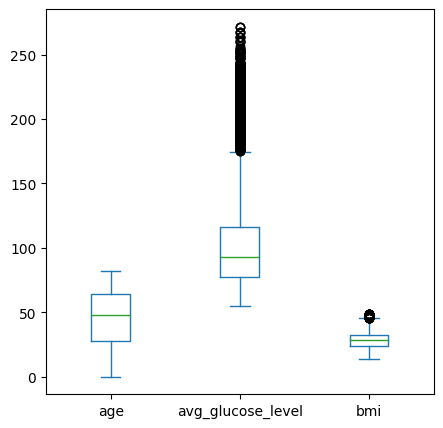

In [17]:
df[['age', 'avg_glucose_level', 'bmi']].plot(kind='box', figsize=(5,5))

In [18]:
Q1 = df[['avg_glucose_level', 'bmi']].quantile(0.25)

Q3 = df[['avg_glucose_level', 'bmi']].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

stroke_filtered = df[(df[['avg_glucose_level', 'bmi']] >= lower_bound) & (df[['avg_glucose_level', 'bmi']] <= upper_bound)]

<Axes: >

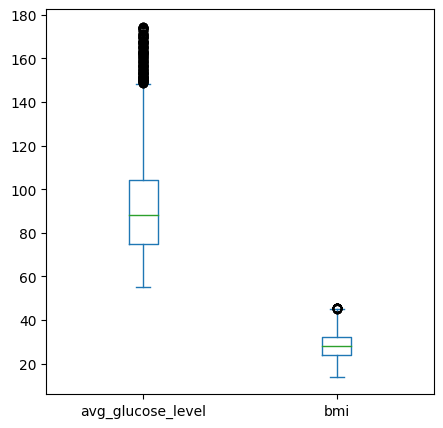

In [19]:
stroke_filtered[['avg_glucose_level', 'bmi']].plot(kind='box', figsize=(5,5))

In [20]:
label_encoder = LabelEncoder()
df['work_type_encoded'] = label_encoder.fit_transform(df['work_type'])

In [21]:
age_grouped = df.groupby('age')['stroke'].mean().reset_index()
age_grouped.columns = ['age', 'mean_stroke_rate']

In [46]:
def bin_age(age):
    if age < 18:
        return '0-17'
    elif 18 <= age < 35:
        return '18-34'
    elif 35 <= age < 50:
        return '35-49'
    elif 50 <= age < 65:
        return '50-64'
    else:
        return '65+'

In [47]:
df['age_group'] = df['age'].apply(bin_age)

In [50]:
df[['age', 'age_group']]

,age,age_group
0,67.0,65+
1,80.0,65+
2,49.0,35-49
3,79.0,65+
4,81.0,65+
...,...,...
5472,79.0,65+
5473,74.0,65+
5474,76.0,65+
5475,74.0,65+


##### Vissualization

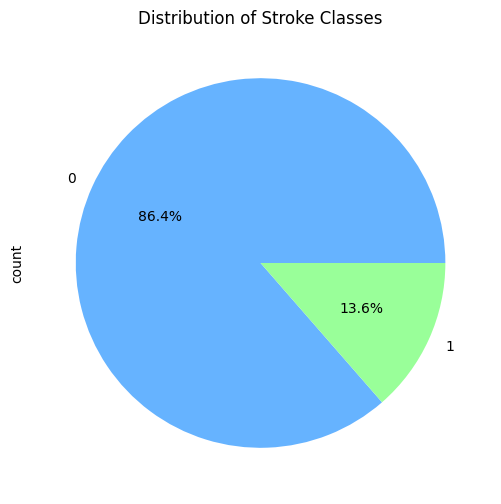

In [42]:
plt.figure(figsize=(8, 6))
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Stroke Classes')
plt.show()

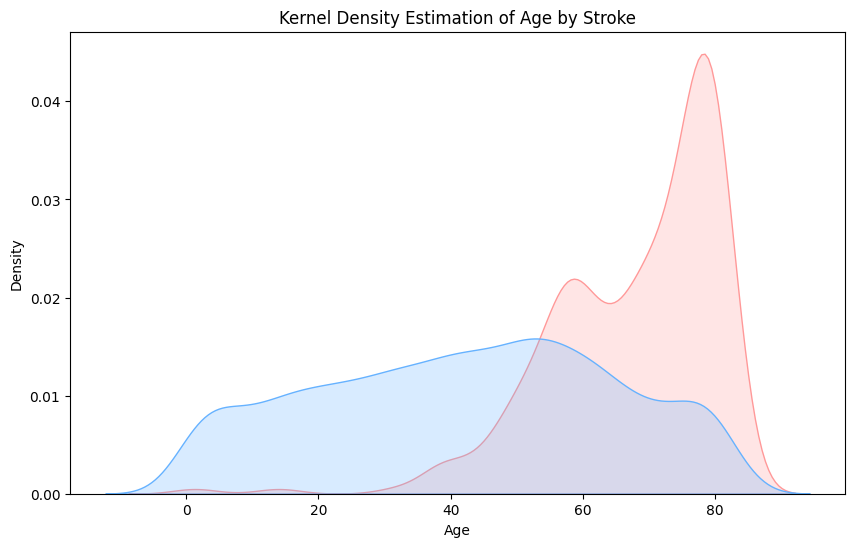

In [43]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['stroke'] == 1]['age'], label='Stroke', fill=True, color='#FF9999')
sns.kdeplot(df[df['stroke'] == 0]['age'], label='No Stroke', fill=True, color='#66B2FF')
plt.title('Kernel Density Estimation of Age by Stroke')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

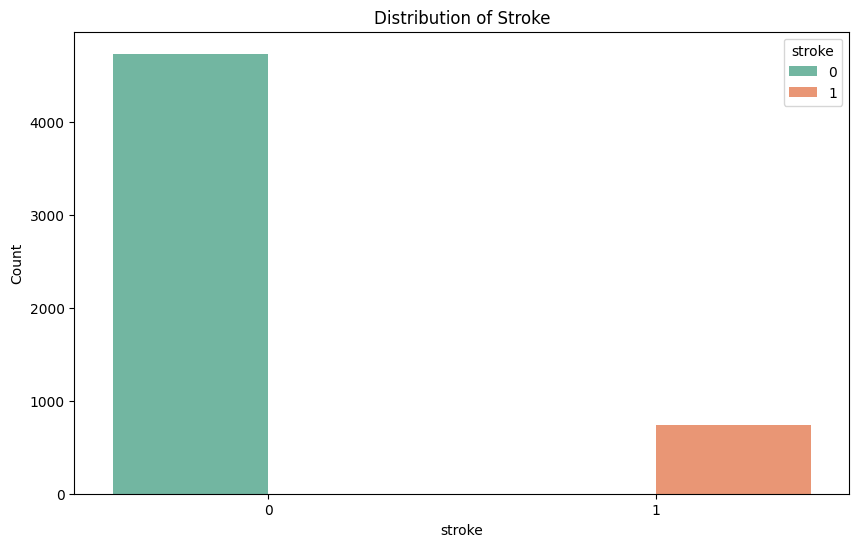

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stroke', data=df, hue='stroke', palette='Set2')
plt.title('Distribution of Stroke')
plt.xlabel('stroke')
plt.ylabel('Count')
plt.show()

##### Decision Tree

In [22]:
X_dt = df[positive_corr_columns].drop('stroke', axis=1)
y_dt = df['stroke']

In [23]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=50, stratify=y_dt)

In [24]:
smote_dt = SMOTE(sampling_strategy=0.6)
X_train_over_dt, y_train_over_dt = smote_dt.fit_resample(X_train_dt, y_train_dt)

In [25]:
scaler_dt = StandardScaler()
X_train_over_dt = scaler_dt.fit_transform(X_train_over_dt)
X_test_dt = scaler_dt.transform(X_test_dt)

In [26]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=2, class_weight='balanced')
dt_model.fit(X_train_over_dt, y_train_over_dt)
y_pred_dt = dt_model.predict(X_test_dt)

In [27]:
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test_dt, y_pred_dt))
print("Classification Report:\n", classification_report(y_test_dt, y_pred_dt, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test_dt, y_pred_dt))


Decision Tree:
Accuracy: 0.9178832116788321
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       947
           1       0.63      0.98      0.76       149

    accuracy                           0.92      1096
   macro avg       0.81      0.94      0.86      1096
weighted avg       0.95      0.92      0.93      1096

Confusion Matrix:
 [[860  87]
 [  3 146]]


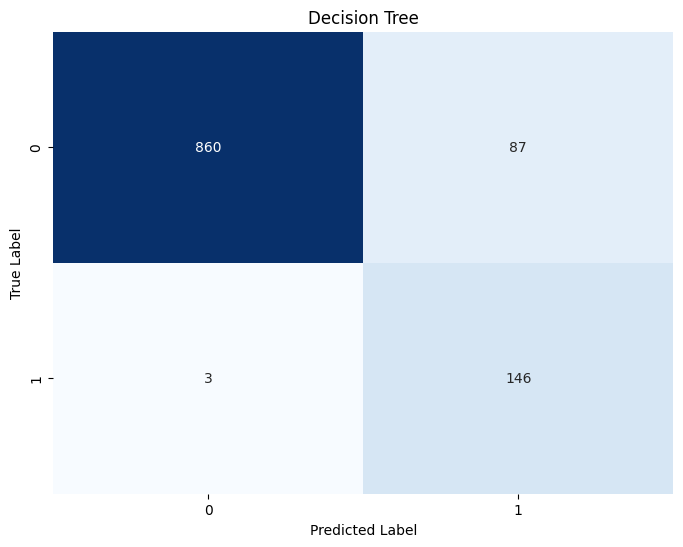

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_dt, y_pred_dt), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Random Forest

In [28]:
X_rf = df[positive_corr_columns].drop('stroke', axis=1)
y_rf = df['stroke']

In [29]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=50, stratify=y_rf)

In [30]:
smote_rf = SMOTE(sampling_strategy=0.6)
X_train_over_rf, y_train_over_rf = smote_rf.fit_resample(X_train_rf, y_train_rf)

In [31]:
scaler_rf = StandardScaler()
X_train_over_rf = scaler_rf.fit_transform(X_train_over_rf)
X_test_rf = scaler_rf.transform(X_test_rf)

In [32]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=150, max_depth=15, min_samples_split=2, class_weight='balanced')
rf_model.fit(X_train_over_rf, y_train_over_rf)
y_pred_rf = rf_model.predict(X_test_rf)

In [33]:
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("Classification Report:\n", classification_report(y_test_rf, y_pred_rf, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, y_pred_rf))


Random Forest:
Accuracy: 0.9352189781021898
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       947
           1       0.68      0.99      0.81       149

    accuracy                           0.94      1096
   macro avg       0.84      0.96      0.88      1096
weighted avg       0.95      0.94      0.94      1096

Confusion Matrix:
 [[878  69]
 [  2 147]]


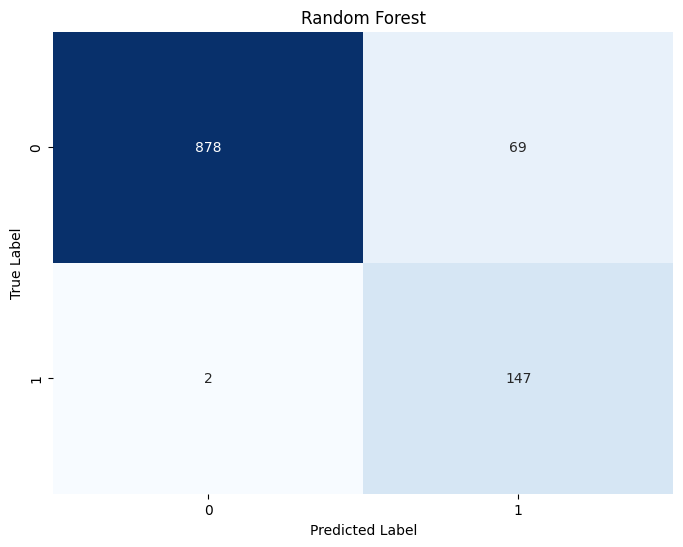

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_rf, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()